### build the SAM index

In [1]:
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt 

In [3]:
import sys
import pathlib

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
url = "https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/aao/monthly.aao.index.b79.current.ascii.table"

In [6]:
sam = pd.read_table(url, sep=r"\s+") 

In [7]:
sam = sam.stack()

In [8]:
sam.index = pd.date_range(start='1979-01-31', freq='M', periods=len(sam))

In [9]:
sam = sam.to_frame(name='SAM')

<AxesSubplot:>

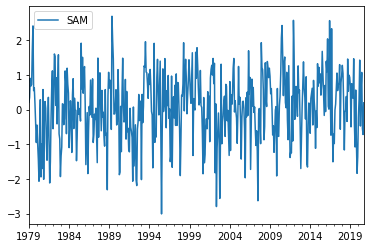

In [10]:
sam.plot()

### calculate the seasonal anomalies 

In [11]:
sam = sam.rolling(window=3, min_periods=3).mean()

In [12]:
sam = sam.iloc[2:,:]

### saves to disk 

In [13]:
opath = pathlib.Path("/media/nicolasf/END19101/data/observational_indices/SAM")

In [14]:
if not opath.exists(): 
    opath.mkdir(parents=True)

In [19]:
sam.index.name = 'date'

In [20]:
sam.to_csv(opath.joinpath("SAM.csv"))

In [22]:
sam

,SAM
date,
1979-03-31,0.488000
1979-04-30,0.644333
1979-05-31,0.767000
1979-06-30,1.034000
1979-07-31,1.612000
...,...
2020-05-31,0.509333
2020-06-30,0.391000
2020-07-31,0.367333
